In [1]:
import pandas as pd
from src.data_preprocessing import load_data, preprocess_data, split_data, scale_data
from src.neural_network import FraudDetectionModel
from src.evaluation import evaluate_model, plot_confusion_matrix
import config


In [2]:
data = load_data(config.DATA_PATH)
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(X, y, config.TEST_SIZE, config.RANDOM_STATE)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


In [3]:
model = FraudDetectionModel(input_dim=X_train_scaled.shape[1])
history = model.train(X_train_scaled, y_train, X_test_scaled, y_test, epochs=config.EPOCHS, batch_size=config.BATCH_SIZE)


Epoch 1/20


/Users/maks/Desktop/credit_card_fraud_detection/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9962 - loss: 0.0226 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 928us/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 924us/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9991 - val_loss: 0.0045
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 679us/step - accuracy: 0.9994 - loss: 0.0027 - va

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 0.9995 - loss: 0.0044
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.76      0.83        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



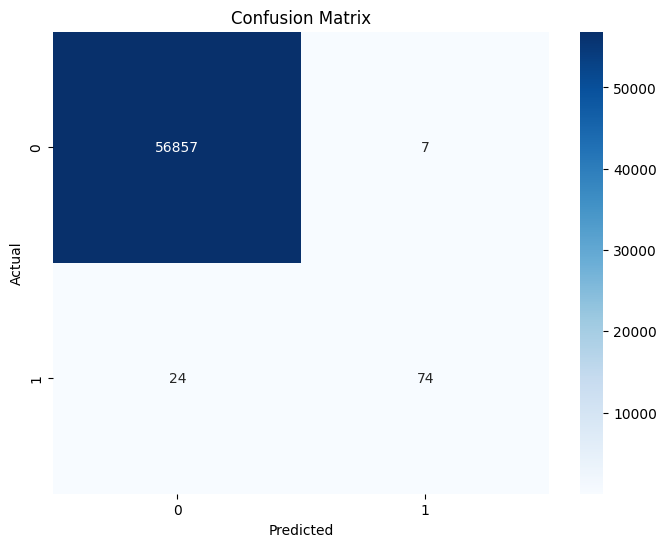

In [4]:
model.evaluate(X_test_scaled, y_test)
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')
evaluate_model(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)


In [5]:
model.save_model(config.MODEL_PATH)


/Users/maks/Desktop/credit_card_fraud_detection/src/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="viridis", hue=None, legend=False)


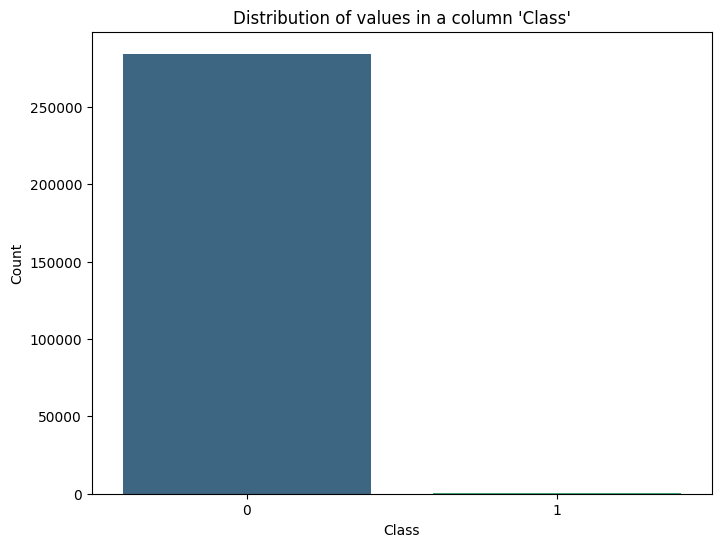

In [6]:
from src.utils import plot_class_distribution, plot_correlation_matrix, plot_time_vs_amount, plot_fraud_vs_nonfraud

plot_class_distribution(data, "Class")


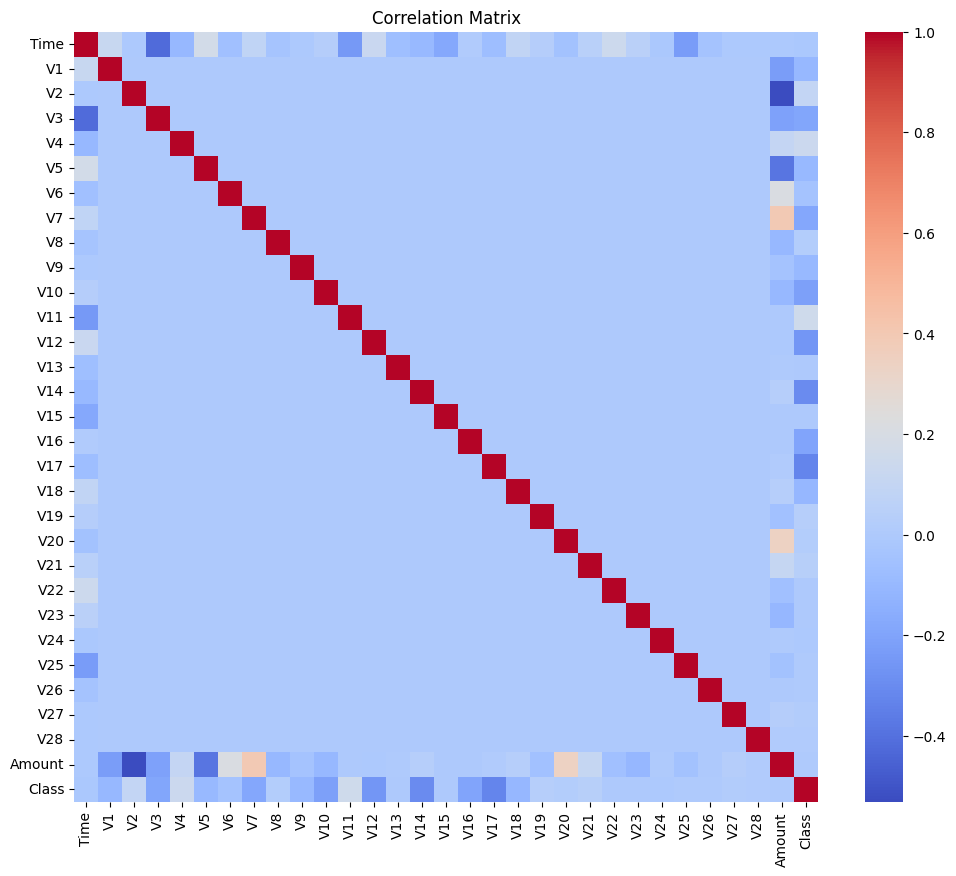

In [7]:
plot_correlation_matrix(data)


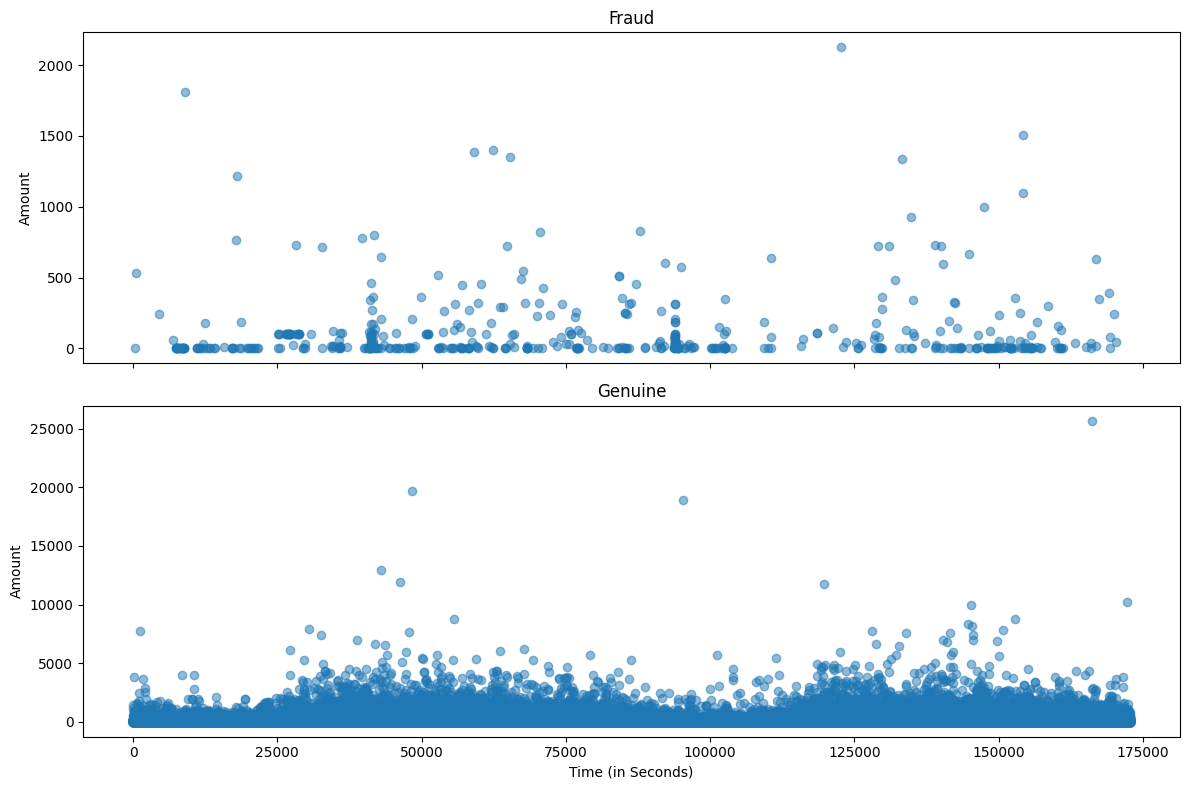

In [8]:
# Візуалізація суми транзакцій за часом
plot_time_vs_amount(data)


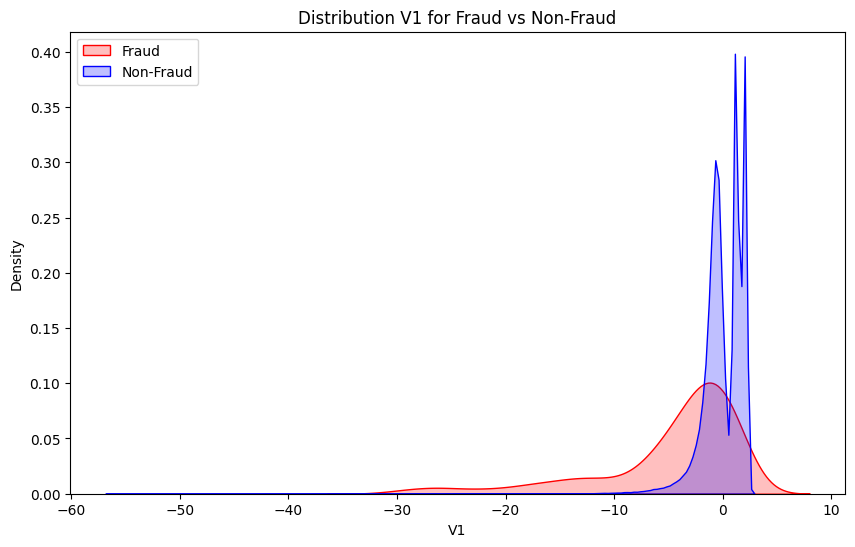

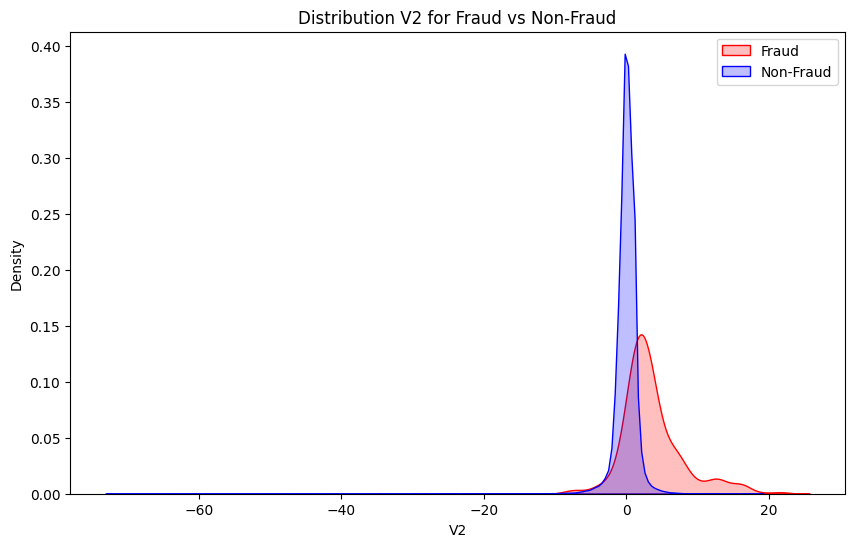

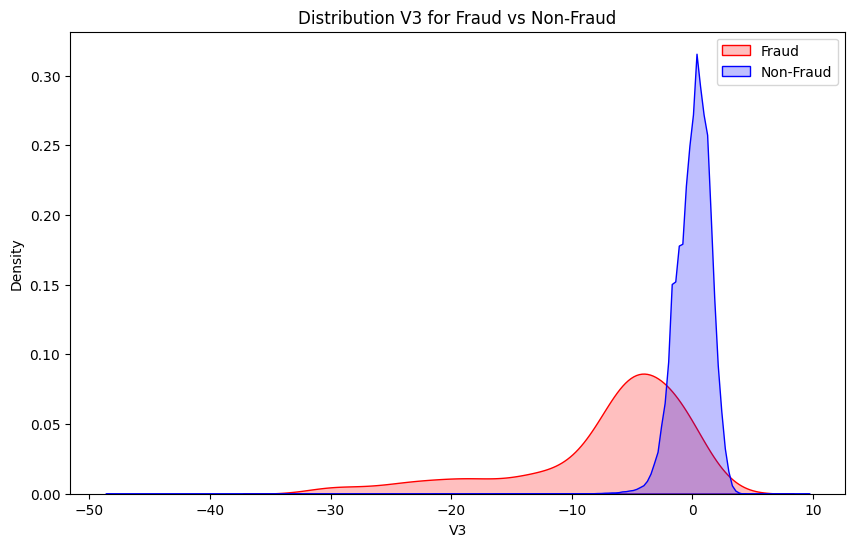

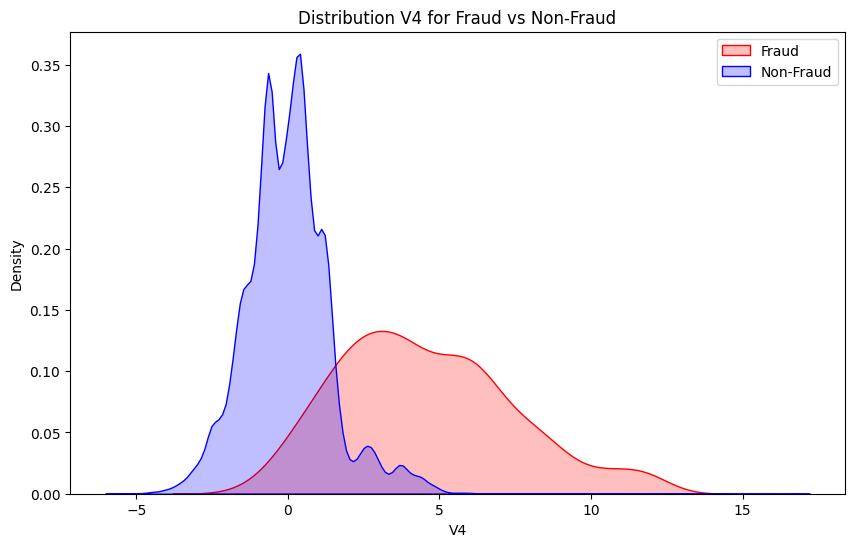

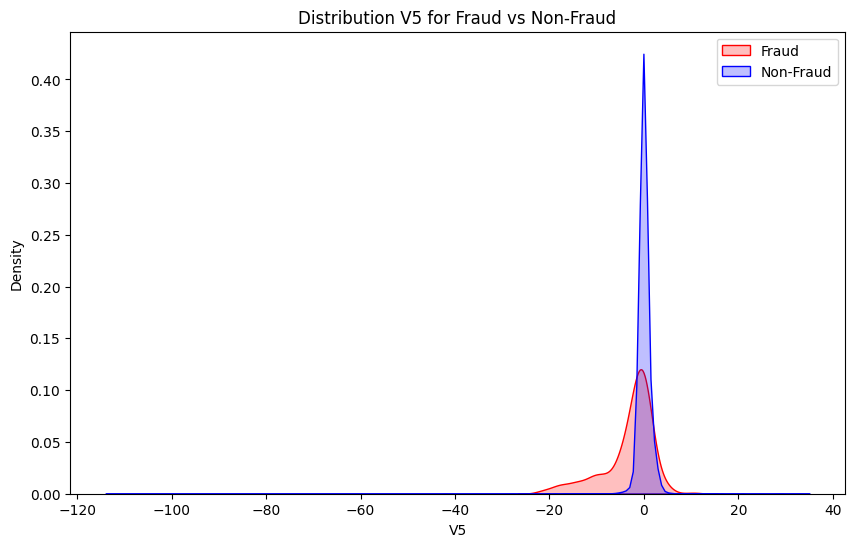

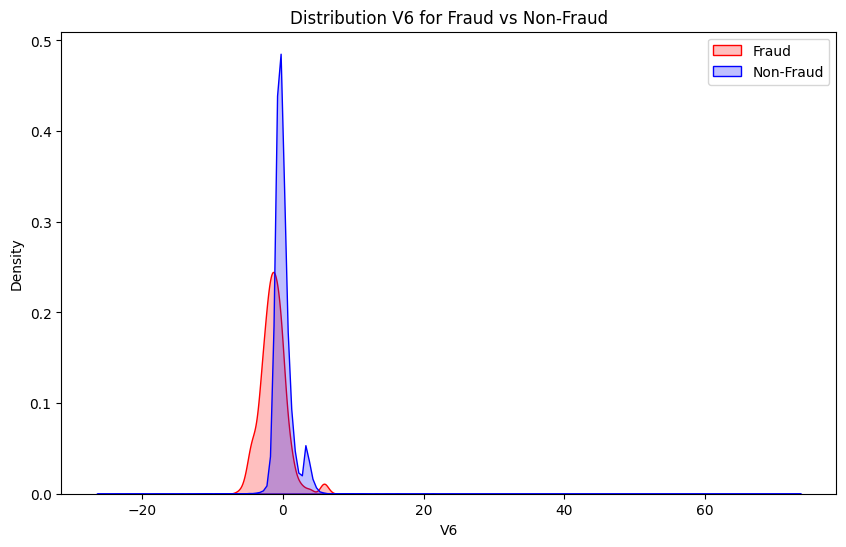

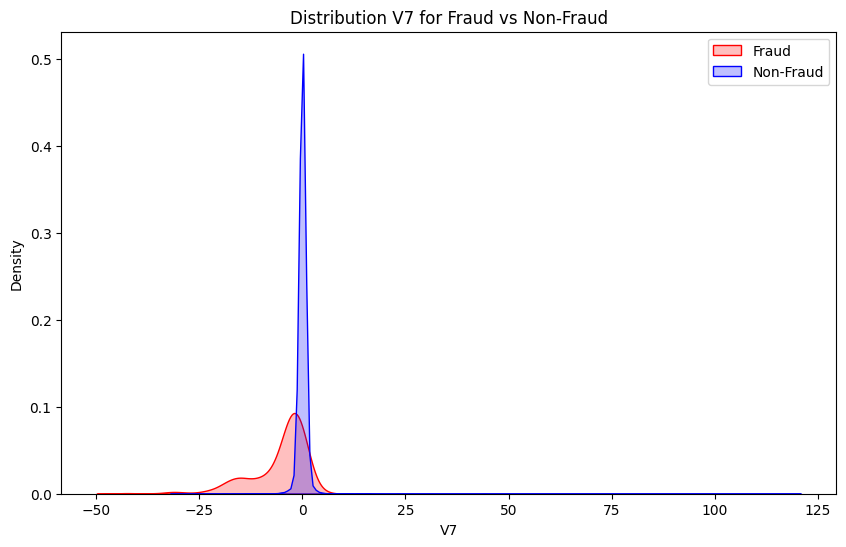

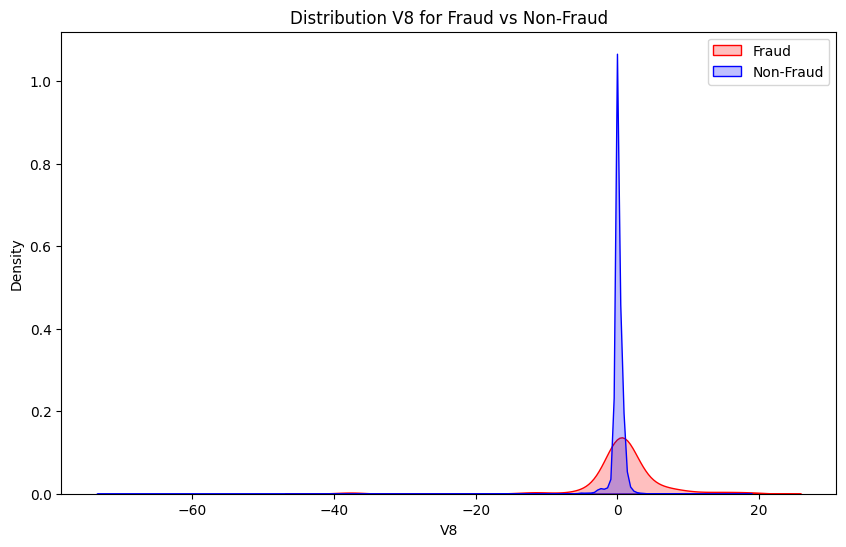

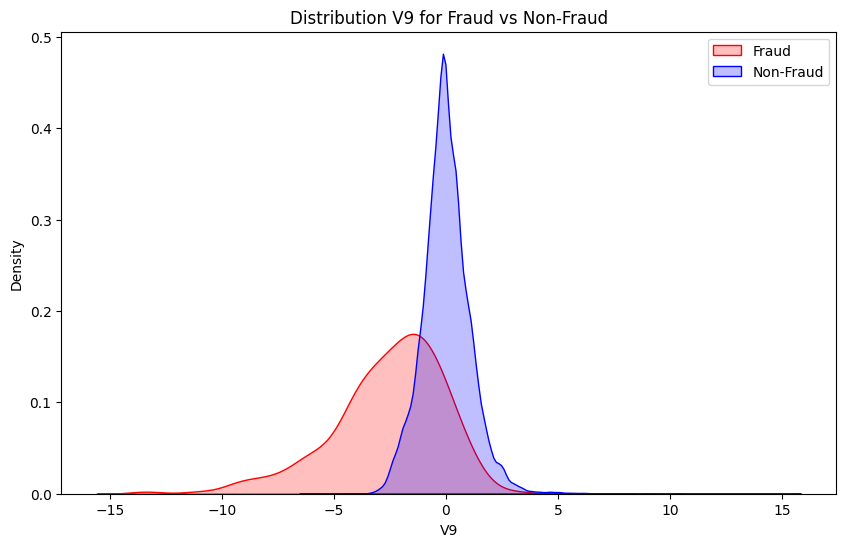

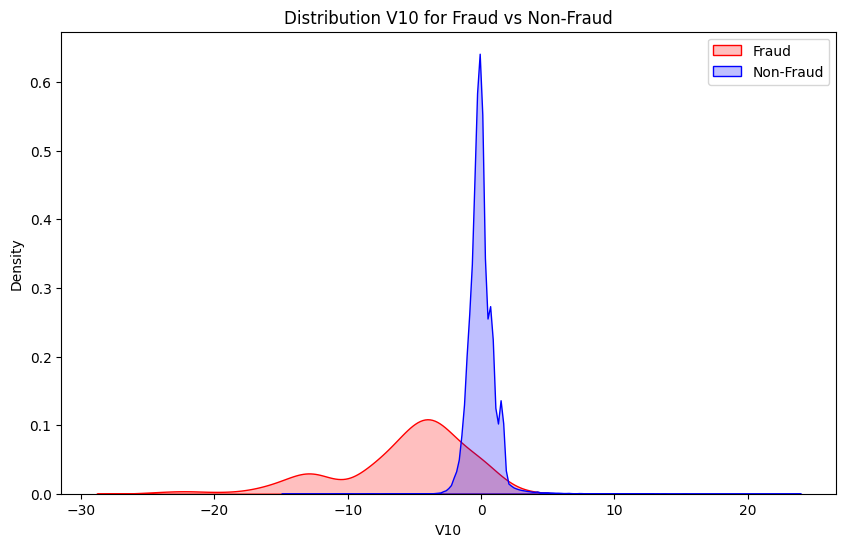

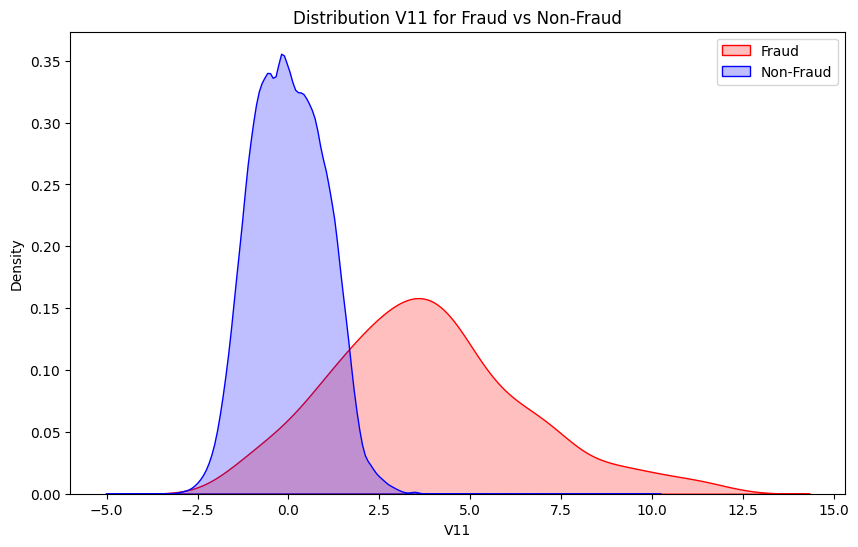

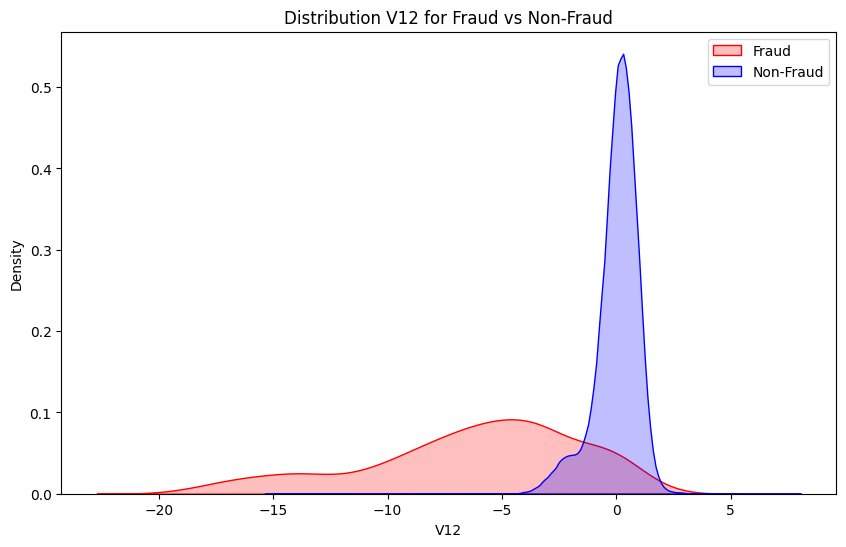

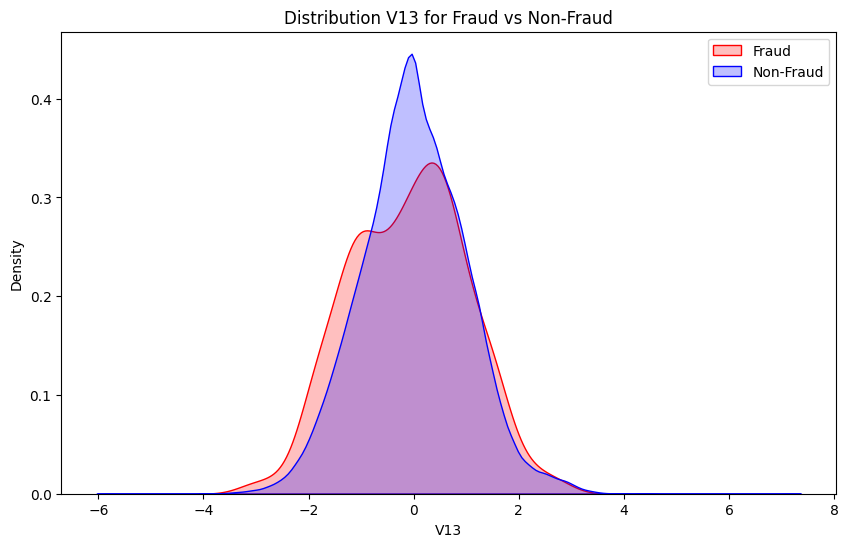

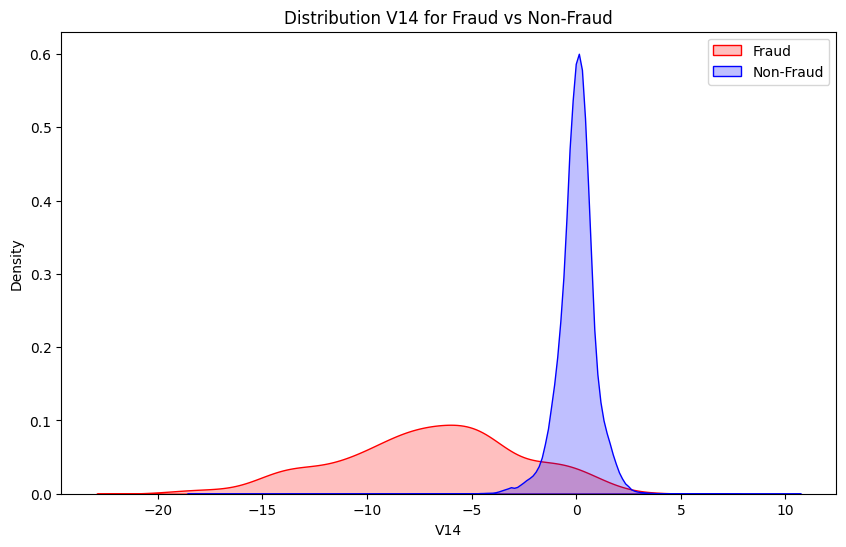

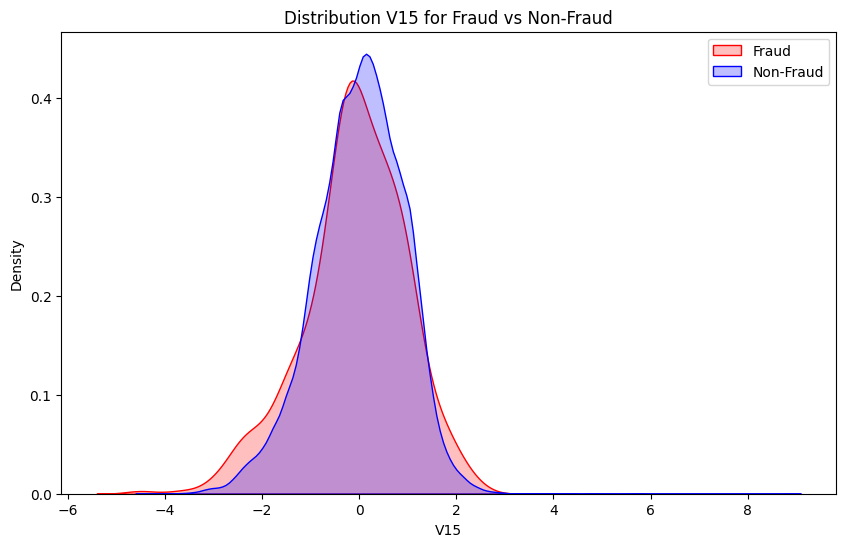

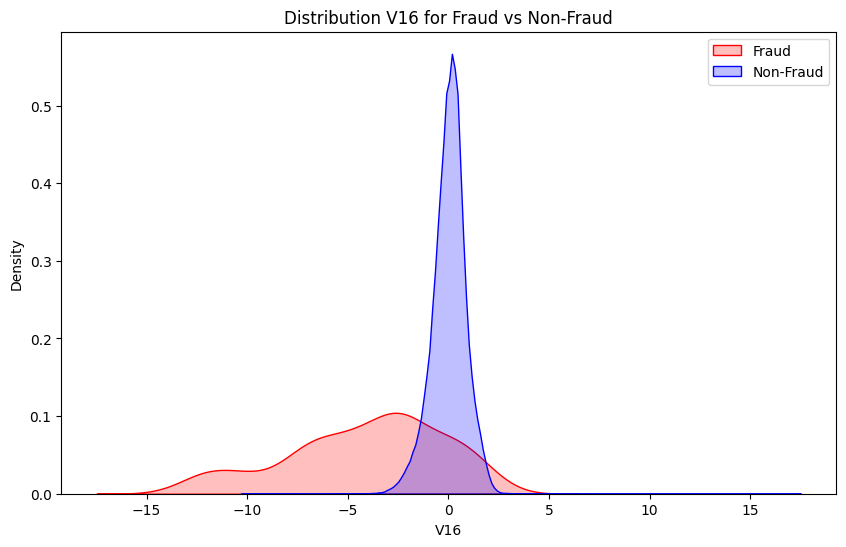

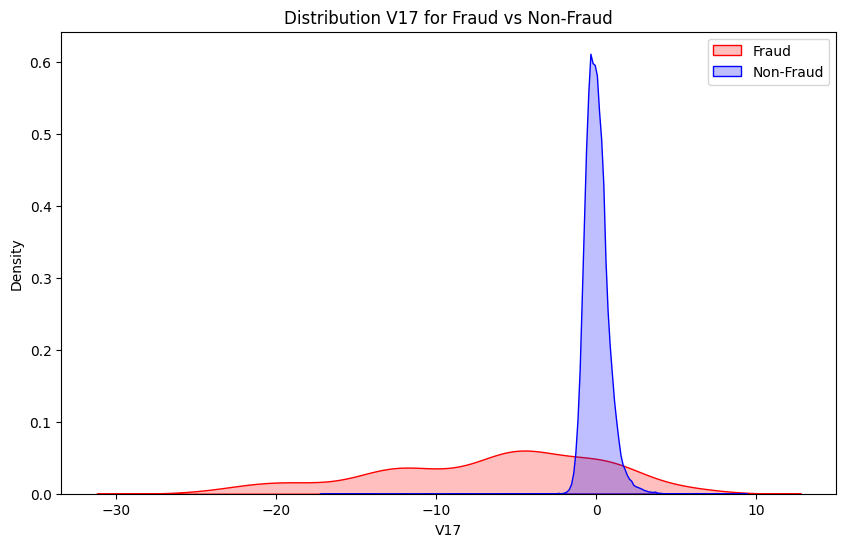

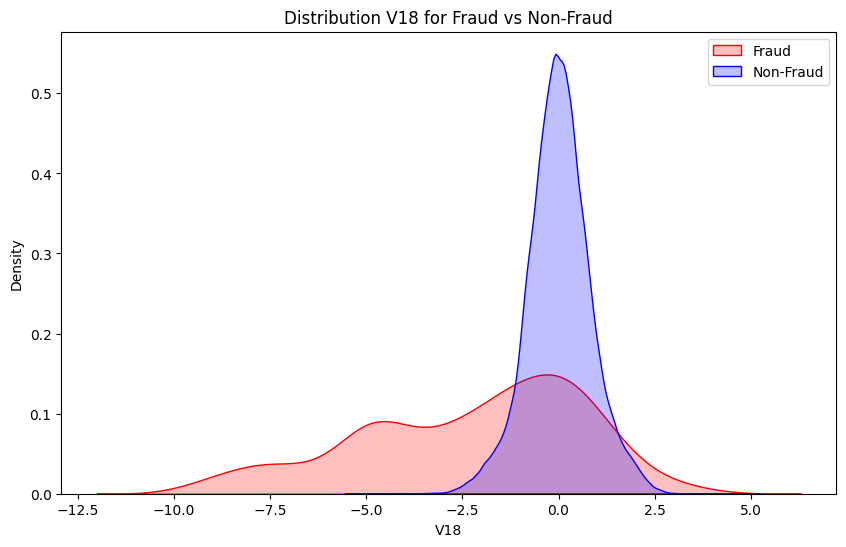

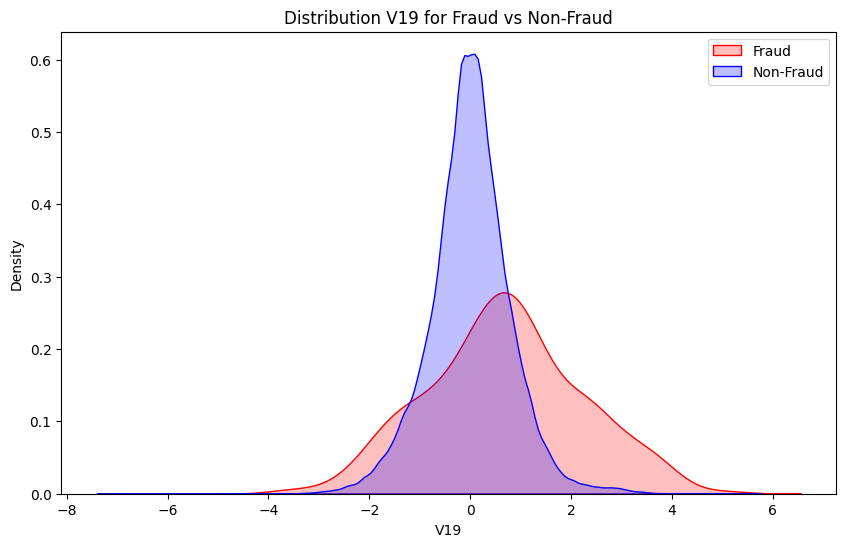

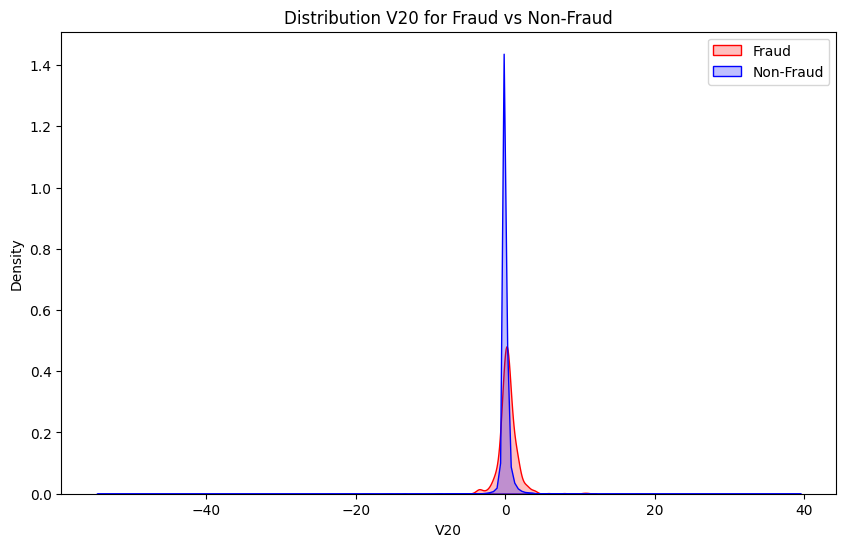

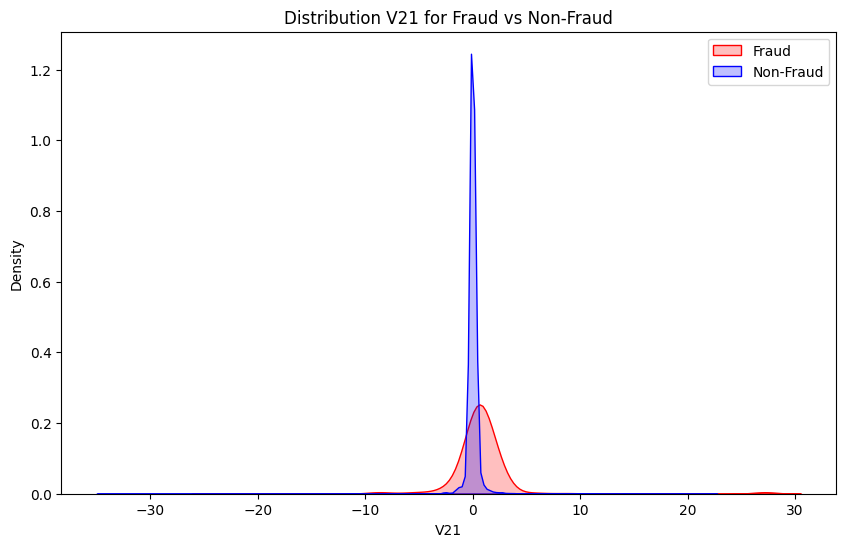

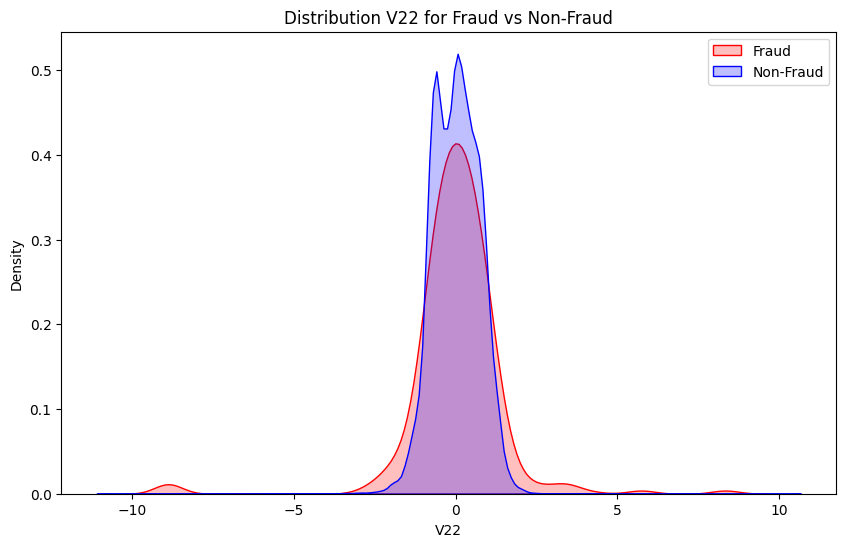

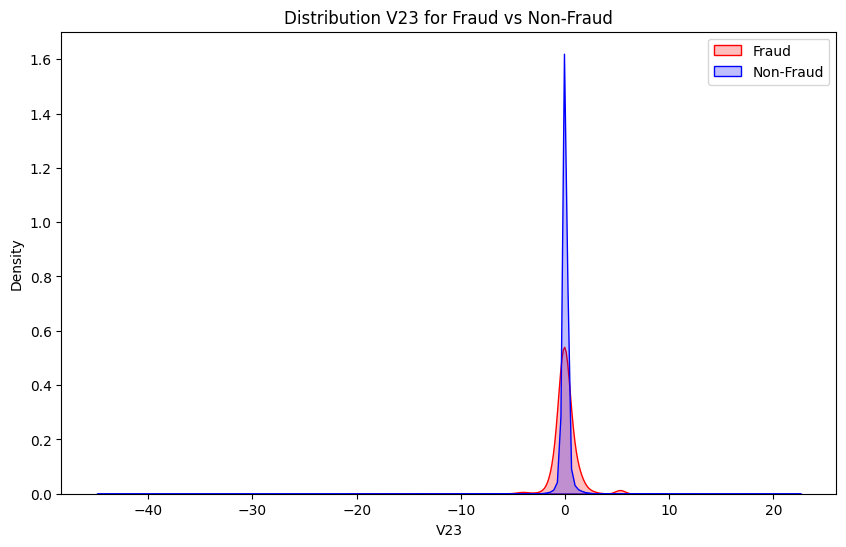

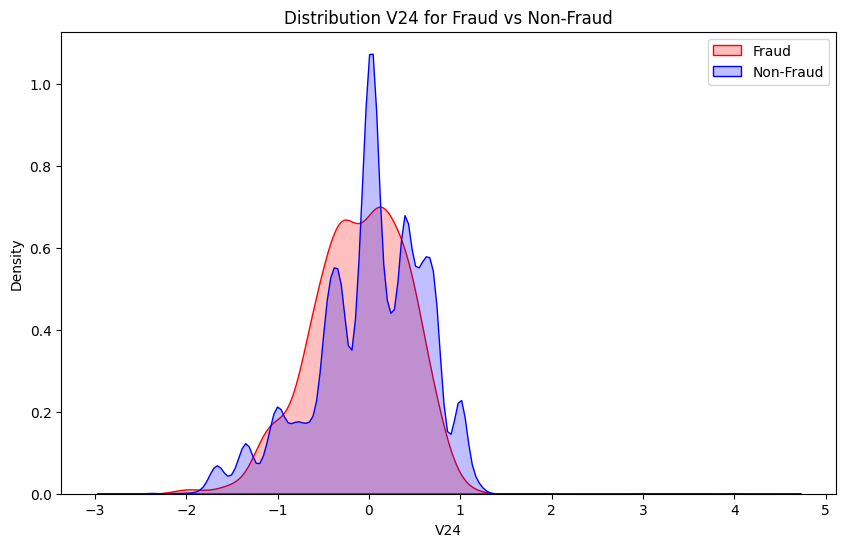

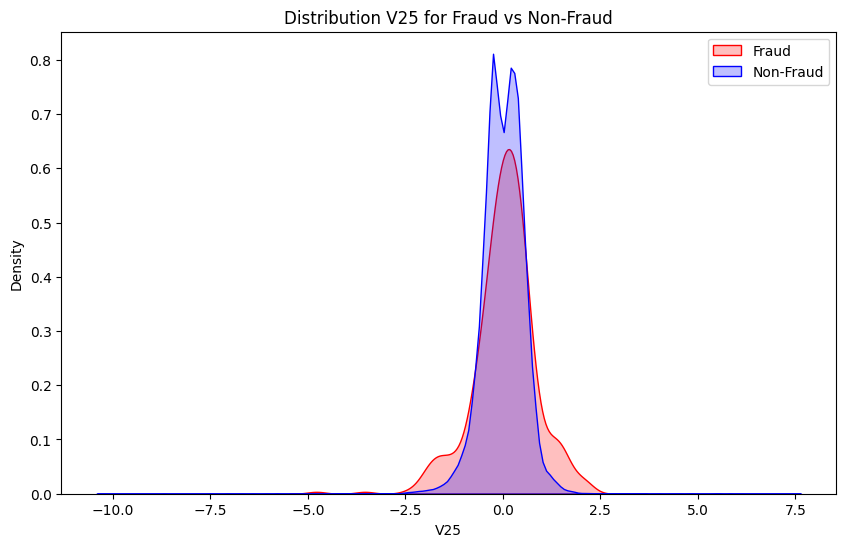

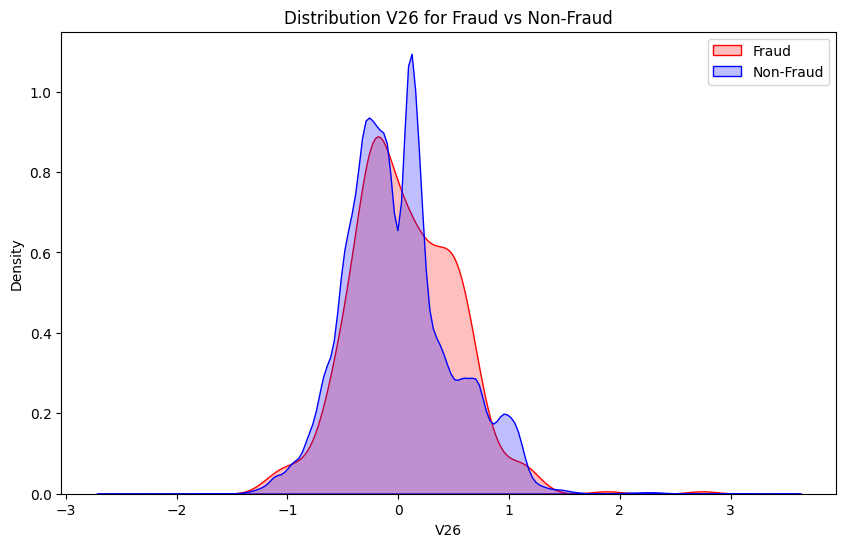

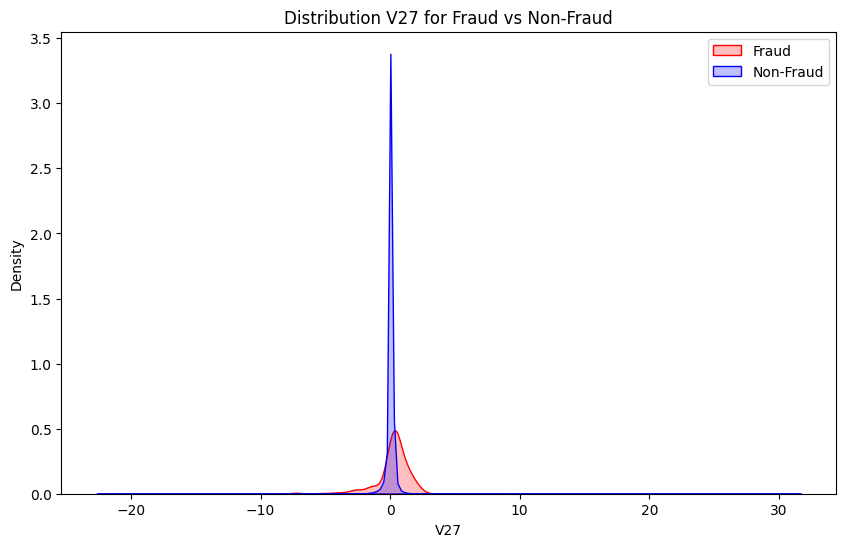

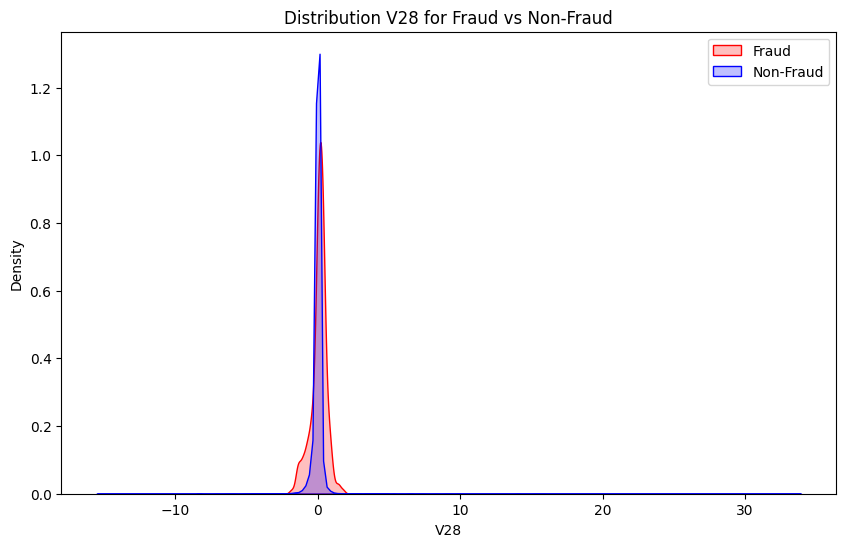

In [9]:
features = [f"V{i}" for i in range(1, 29)]

for feature in features:
    plot_fraud_vs_nonfraud(data, feature)